In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
def f(x):
  return 3*x**3 - 2*x**2  + 4*x - 1

In [160]:
X = np.random.rand(100, 1)
Y = f(X)

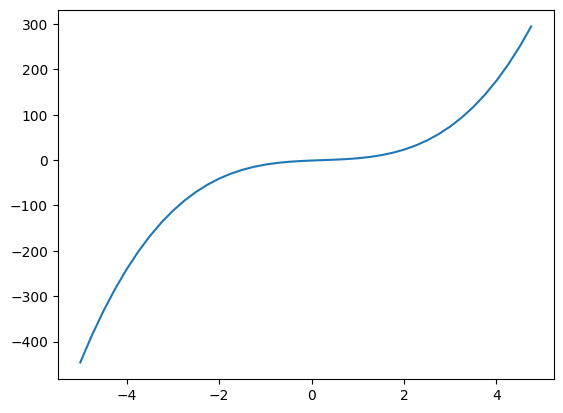

In [161]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [162]:
# Expanding the features for polynomial regression
def polynomial_features(X, degree):
    m = X.shape[0]
    features = []

    for i in range(m):
        row = []
        for d in range(1, degree + 1):
            row.append(X[i][0] ** d)
        features.append(row)

    return np.array(features)

polynomial_features(X, 3)[0:5]

array([[7.57764059e-01, 5.74206370e-01, 4.35112950e-01],
       [8.52593842e-01, 7.26916259e-01, 6.19764326e-01],
       [8.94771675e-02, 8.00616351e-03, 7.16368833e-04],
       [6.34321317e-01, 4.02363533e-01, 2.55227766e-01],
       [6.69856513e-01, 4.48707749e-01, 3.00569808e-01]])

In [163]:
def dot_product(X, w, b):
    m = len(X)
    predictions = []

    for i in range(m):
        dot = 0.0
        for j in range(len(X[i])):
            dot += X[i][j] * w[j][0]
        y_hat = dot + b
        predictions.append([y_hat])

    return np.array(predictions)

In [164]:
def compute_gradients(X, error):
    m = len(X)
    n = len(X[0])
    dw = np.zeros((n, 1))
    db = 0.0

    for i in range(m):
        for j in range(n):
            dw[j][0] += X[i][j] * error[i][0]
        db += error[i][0]

    dw *= 2 / m
    db *= 2 / m
    return dw, db

In [165]:
class PolynomialRegression:
    def __init__(self, degree=3, lr=0.001, epochs=10000):
        self.degree = degree
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X_poly = polynomial_features(X, self.degree)
        m, n = X_poly.shape
        self.w = np.zeros((n, 1))
        self.b = 0

        for epoch in range(self.epochs):
            y_pred = dot_product(X_poly, self.w, self.b)
            error = y_pred - y

            dw, db = compute_gradients(X_poly, error)

            for j in range(len(self.w)):
                self.w[j][0] -= self.lr * dw[j][0]
            self.b -= self.lr * db

            if epoch % 100 == 0:
                loss = np.mean(error ** 2)
                print(f"Epoch {epoch} | Loss: {loss:.4f} | f(x) = {self.w.ravel()[0]}x^3 + {self.w.ravel()[1]}x^2 + {self.w.ravel()[2]}x + {self.b:.4f}")

    def predict(self, X):
        X_poly = polynomial_features(X, self.degree)
        return X_poly.dot(self.w) + self.b

In [166]:
model = PolynomialRegression()
model.fit(X, Y)

Epoch 0 | Loss: 3.5662 | f(x) = 0.0021526622037146654x^3 + 0.0017858376676465329x^2 + 0.001517652888227164x + 0.0025
Epoch 100 | Loss: 2.3506 | f(x) = 0.1904092864936176x^3 + 0.15993759615066944x^2 + 0.1367531648362887x + 0.2057
Epoch 200 | Loss: 1.6776 | f(x) = 0.33504567507480437x^3 + 0.28498213233524355x^2 + 0.2451511884175118x + 0.3406
Epoch 300 | Loss: 1.2934 | f(x) = 0.4477187003738818x^3 + 0.3856120942606891x^2 + 0.3336832769832591x + 0.4263
Epoch 400 | Loss: 1.0638 | f(x) = 0.5369123999084929x^3 + 0.46815947632580324x^2 + 0.4074303750981282x + 0.4765
Epoch 500 | Loss: 0.9178 | f(x) = 0.608803561780949x^3 + 0.5372394507990694x^2 + 0.4700983626588985x + 0.5014
Epoch 600 | Loss: 0.8175 | f(x) = 0.6678911013514726x^3 + 0.5962185108883025x^2 + 0.5243929206185249x + 0.5083
Epoch 700 | Loss: 0.7429 | f(x) = 0.7174536901693012x^3 + 0.6475548703079056x^2 + 0.572292108996222x + 0.5024
Epoch 800 | Loss: 0.6834 | f(x) = 0.7598825068191097x^3 + 0.6930459801208594x^2 + 0.6152445710513734x + 

In [167]:
xs = np.linspace(-5, 5, 200).reshape(-1, 1)
ys_pred = model.predict(xs)
ys_pred[0:5]

array([[-151.42209754],
       [-146.68274807],
       [-142.0451    ],
       [-137.50803812],
       [-133.07044725]])

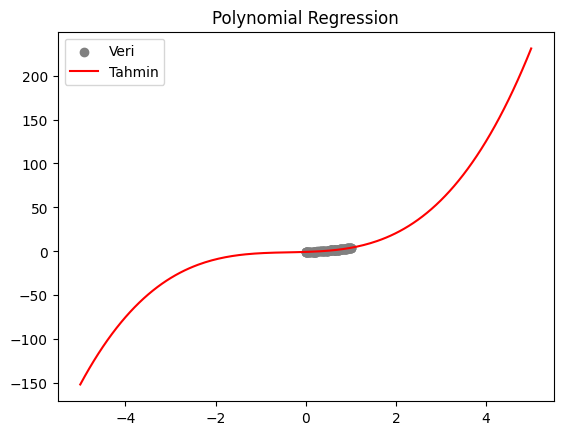

In [168]:
plt.scatter(X, Y, color='gray', label='Veri')
plt.plot(xs, ys_pred, color='red', label='Tahmin')
plt.legend()
plt.title("Polynomial Regression")
plt.show()